In [1]:
suppressMessages(library(MuSiC))
suppressMessages(library(Seurat))
suppressMessages(library(fastSave))
suppressMessages(library(pbmcapply))
suppressMessages(library(SingleCellExperiment))

## 数据导入及bulk数据整理

In [2]:
ref_seurat<-readRDS.lbzip2('~/scRNA_Seq_data/PBMC/Stephenson_seurat.rdsFS',n.cores = 200)
bulk.mtx<- readRDS("~/ReCIDE/应用_前二_新_inter/SLE/bulkdata/GSE50772_exprs.rds")
bulk.mtx<-as.matrix(bulk.mtx)

###########################

In [3]:

kk<-as.data.frame(ref_seurat@assays[["RNA"]]@counts)
kksum<-as.data.frame(apply(kk, 2, sum))
all(kksum>0)
kksum<-subset(kksum,kksum[,1]>0,)
kksum<-as.data.frame(kksum)
ref_seurat<-ref_seurat[,row.names(kksum)]
rm(kksum)
gc()


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 11.7 GiB”


[1] TRUE

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,8352722,446.1,12952824,691.8,12952824,691.8
Vcells,1971554384,15041.8,5879257659,44855.2,6975455127,53218.5


In [4]:
head(ref_seurat@meta.data)

,nCount_raw,nFeature_raw,sample_id,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,full_clustering,initial_clustering,⋯,Days_from_onset,Site,time_after_LPS,Worst_Clinical_Status,Outcome,patient_id,nCount_RNA,nFeature_RNA,true,scibet_prd
,<dbl>,<int>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<chr>,<chr>
AAACCTGAGACCACGA-newcastle65,4983,1506,newcastle65,1351,1351,4278,178,4.160823,CD4.Naive,CD4,⋯,Healthy,Ncl,nan,Healthy,Home,newcastle65,2114.782,1446,CD4.Naive,T4
AAACCTGAGATGTCGG-newcastle65,5642,2077,newcastle65,1921,1921,4740,127,2.679325,NK_16hi,NK_16hi,⋯,Healthy,Ncl,nan,Healthy,Home,newcastle65,2790.520,1995,NK,NK
AAACCTGAGGCGATAC-newcastle65,3910,1213,newcastle65,1056,1056,2875,198,6.886957,CD4.Naive,Treg,⋯,Healthy,Ncl,nan,Healthy,Home,newcastle65,1963.209,1128,CD4.Naive,T4
AAACCTGAGTACACCT-newcastle65,6008,2298,newcastle65,2140,2140,5260,316,6.007605,NK_16hi,NK_16hi,⋯,Healthy,Ncl,nan,Healthy,Home,newcastle65,2980.832,2223,NK,NK
AAACCTGAGTGAATTG-newcastle65,4298,1730,newcastle65,1620,1620,4043,232,5.738313,CD8.EM,CD4,⋯,Healthy,Ncl,nan,Healthy,Home,newcastle65,2579.246,1772,CD8.EM,T8
AAACCTGCATCACGAT-newcastle65,6661,2082,newcastle65,1925,1925,5846,201,3.438248,CD4.IL22,CD4,⋯,Healthy,Ncl,nan,Healthy,Home,newcastle65,2576.568,2012,CD4.IL22,T8


In [5]:
#单细胞参考集是sce的形式
sce <- SingleCellExperiment(as.matrix(ref_seurat@assays$RNA@counts),
                            colData=DataFrame(label=ref_seurat@meta.data),
                            rowData=DataFrame(length=row.names(ref_seurat)))
names(assays(sce))<-'counts'

#在music前要先确定bulk和sc是否只有一列，只有一列的话无法运行（包括sample和cluster数是否为1）
music_output = music_prop(bulk.mtx = bulk.mtx, sc.sce = sce, clusters = 'label.true',
                              samples = 'label.patient_id',verbose = F)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 11.7 GiB”


In [6]:
saveRDS(music_output,file='/home/lmh/ReCIDE/应用_前二_新_inter/SLE/music/MuSiC_output.rds')

In [7]:
music_output=readRDS('/home/lmh/ReCIDE/应用_前二_新_inter/SLE/music/MuSiC_output.rds')
prd_df=as.data.frame(t(music_output$Est.prop.weighted))

In [8]:
saveRDS(prd_df,file='/home/lmh/ReCIDE/应用_前二_新_inter/SLE/music/MuSiC_prd_df.rds')

In [9]:
library(ggplot2)
library(ggpubr)

prd_df<- readRDS("/home/lmh/ReCIDE/应用_前二_新_inter/SLE/music/MuSiC_prd_df.rds")
prd_df=prd_df[,sort(colnames(prd_df))]

In [10]:
prd_df

,GSM1228860,GSM1228861,GSM1228862,GSM1228863,GSM1228864,GSM1228865,GSM1228866,GSM1228867,GSM1228868,GSM1228869,⋯,GSM1228931,GSM1228932,GSM1228933,GSM1228934,GSM1228935,GSM1228936,GSM1228937,GSM1228938,GSM1228939,GSM1228940
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CD4.Naive,0.000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000,⋯,0.0000000000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.000000e+00,0.000000000,0.000000000,0.0000000000,0.0000000000
NK,0.000000000,0.0000000000,0.000000000,0.001271149,0.002986044,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000,⋯,0.0000000000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.000000e+00,0.000000000,0.149285511,0.0000000000,0.0000000000
CD8.EM,0.000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000,⋯,0.0000000000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.000000e+00,0.000000000,0.000000000,0.0000000000,0.0000000000
CD4.IL22,0.000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000,⋯,0.0000000000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.000000e+00,0.000000000,0.000000000,0.0000000000,0.0000000000
DC,0.000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000,⋯,0.0000000000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.000000e+00,0.000000000,0.000000000,0.0000000000,0.0000000000
CD14.mono,0.079899183,0.1842152327,0.117660664,0.237087585,0.103150030,0.2694326060,0.1520189530,0.1732577001,0.1061066261,0.057790452,⋯,0.2264957073,0.1098791099,0.208765065,0.1752331810,0.191495185,1.422396e-01,0.109059871,0.139920351,0.2089762761,0.2668383029
gdT,0.000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000,⋯,0.0000000000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.000000e+00,0.000000000,0.000000000,0.0000000000,0.0000000000
MAIT,0.000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000,⋯,0.0000000000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.000000e+00,0.000000000,0.000000000,0.0000000000,0.0000000000
CD4.CM,0.000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000,⋯,0.0000000000,0.0000000000,0.000000000,0.0000000000,0.000000000,0.000000e+00,0.000000000,0.000000000,0.0000000000,0.0000000000


Warning message in readRDS("~/SWORD/应用/SLE/bulk_data/GSE50772_meta.rds"):
“input string 'Samples were hybridized to GeneChip® Human Genome U133 Plus 2.0 Arrays (Affymetrix, Inc.).  Arrays were washed and stained in the Affymetrix Fluidics station and scanned on a GeneChip® scanner 3000' cannot be translated from 'ANSI_X3.4-1968' to UTF-8, but is valid UTF-8”
Warning message in readRDS("~/SWORD/应用/SLE/bulk_data/GSE50772_meta.rds"):
“input string 'Samples were hybridized to GeneChip® Human Genome U133 Plus 2.0 Arrays (Affymetrix, Inc.).  Arrays were washed and stained in the Affymetrix Fluidics station and scanned on a GeneChip® scanner 3000' cannot be translated from 'ANSI_X3.4-1968' to UTF-8, but is valid UTF-8”
Warning message in readRDS("~/SWORD/应用/SLE/bulk_data/GSE50772_meta.rds"):
“input string 'Samples were hybridized to GeneChip® Human Genome U133 Plus 2.0 Arrays (Affymetrix, Inc.).  Arrays were washed and stained in the Affymetrix Fluidics station and scanned on a GeneChip® scan

[1] TRUE

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“Computation failed in `stat_compare_means()`
Caused by error in `data.frame()`:
! arguments imply differing number of rows: 0, 1”


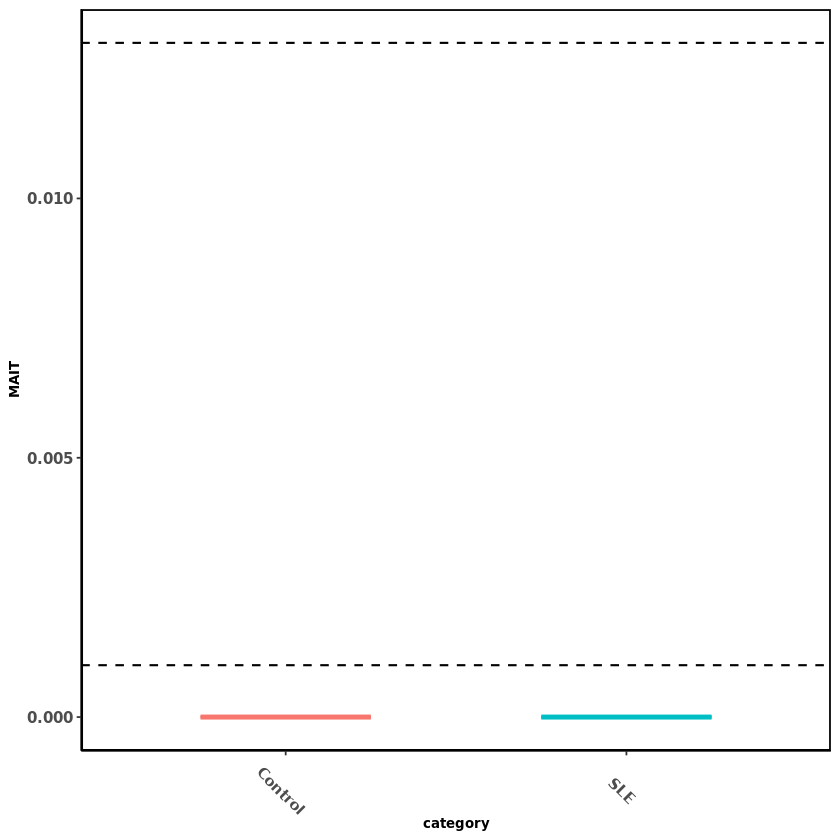

In [11]:


metadata<- readRDS("~/SWORD/应用/SLE/bulk_data/GSE50772_meta.rds")
metadata=metadata[sort(row.names(metadata)),]
# [1] "B_exhausted"           "B_immature"           
# [3] "B_naive"               "B_non_switched_memory"
# [5] "B_switched_memory"     "CD14_mono"            
# [7] "CD16_mono"             "CD4_CM"               
# [9] "CD4_EM"                "CD4_IL22"             
# [11] "CD4_Naive"             "CD4_Th"               
# [13] "CD8_EM"                "CD8_Naive"            
# [15] "CD8_TE"                "DC"                   
# [17] "HSC"                   "ILC"                  
# [19] "Lymph_prolif"          "MAIT"                 
# [21] "NK"                    "NKT"                  
# [23] "Plasma"                "Platelets"            
# [25] "RBC"                   "Treg"                 
# [27] "gdT"                   "pDC"                  
# [29] "category"             

all(row.names(metadata)==colnames(prd_df))

plot_data=as.data.frame(t(prd_df))

plot_data[,'category']=metadata[,'disease.status.ch1']

ggplot(plot_data, aes(x= category, y=MAIT,fill=category)) + 
  geom_boxplot(aes(color = category),#这里的fill如果不设就是空心的
               size = .7, alpha = .5, outlier.size = 1,
               position = position_dodge(width = 0.5), width = 0.5) +
  # position_dodge是箱子间距离  width是箱宽
  # geom_boxplot(data=subset(plot_data, methods %in% 'empty'), width = .5) +
  theme_classic() +
  theme(
    axis.text.x = element_text(size = 9, face = "bold", angle = -45),
    axis.text.y = element_text(size = 9, face = "bold"),
    # axis.text.x = element_blank(),
    # axis.text.y = element_blank(),
    axis.title = element_text(size = 8, face = "bold"),
    plot.title = element_text(size = 8, face = "bold", hjust = 0.5),
    plot.subtitle = element_text(size = 10, face = "bold", hjust = 0.5),
    panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"),
    legend.position = 'none'
    # axis.title = element_text(size = 8)
  )+
  stat_compare_means()+
  geom_hline(yintercept = 0.001,col = 'Black',linewidth=0.6,linetype=2)+
  geom_hline(yintercept = 0.013,col = 'Black',linewidth=0.6,linetype=2)



